In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-byo3iwsk because the default path (/home/i313924/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
model = pd.read_pickle('/pio/scratch/1/i313924/SVD_data/model.pkl')

## ABX

In [42]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/test_data/test_ABX_weighted.json', lines=True)

In [43]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [44]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [45]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [46]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [47]:
(dist_A < dist_B).mean()

0.5087

In [48]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [49]:
(cos_dist_A < cos_dist_B).mean()

0.5019

## Embeddings PCA

In [30]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [31]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.003721,0.099647,-0.116876,0.004358,-0.199613,-0.120329,0.000542,-0.025257,-0.104759,0.175317,...,-0.013824,0.066009,0.047113,-0.159727,-0.189804,-0.032864,-0.003329,-0.272890,0.001688,0.121980
1,0.255634,0.257806,0.209756,0.025947,0.085210,0.213499,-0.242501,0.136960,-0.126327,-0.185530,...,-0.365902,-0.172759,-0.146467,-0.193237,0.075043,0.321666,-0.339886,-0.452982,-0.190465,-0.014425
2,-0.012672,0.204867,0.139557,-0.206312,0.202447,-0.136870,0.121735,-0.197349,-0.066169,-0.093094,...,-0.033632,-0.178764,-0.237539,0.109096,0.068194,-0.255342,0.127981,0.418985,0.336380,0.028430
3,0.102649,0.047109,0.066571,0.186748,0.057317,-0.083147,0.150773,-0.068969,0.057061,-0.038018,...,-0.026584,0.108768,-0.007473,0.034509,0.055519,-0.167293,0.041035,-0.101140,-0.077980,0.035525
4,-0.251254,-0.104307,-0.208048,0.703706,0.255345,0.105362,0.045513,-0.146562,-0.631750,0.198006,...,-0.211346,0.189716,-0.511361,0.221729,-0.141699,0.385193,-0.032836,0.154137,-0.242041,0.841448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681292,-0.058635,0.123996,0.079730,-0.083508,0.016450,0.078924,-0.075653,-0.196135,0.165295,-0.097613,...,0.134396,0.116594,-0.088329,0.040793,-0.115153,0.199462,0.017787,-0.076194,-0.006367,-0.038803
2681293,-0.061721,-0.126140,-0.119479,-0.098247,0.096272,-0.021067,0.065799,-0.079136,0.010531,-0.019958,...,-0.181318,-0.076686,-0.116447,0.141820,-0.027724,-0.056174,-0.161236,0.046094,-0.092918,0.135674
2681294,0.110051,0.056492,-0.060212,-0.026136,0.033234,0.057292,0.054909,-0.071800,-0.033966,0.111346,...,0.026511,0.156679,0.007979,0.028185,-0.068871,-0.049986,0.021673,-0.049030,-0.030423,0.041595
2681295,-0.231257,-0.159063,-0.114295,-0.025037,0.060055,-0.167574,-0.230253,0.093038,-0.074409,0.089449,...,-0.053493,0.084789,0.006641,0.010929,0.243075,0.094034,0.114500,0.015779,-0.029205,-0.008201


In [32]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [33]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [34]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [35]:
reduced_item_embeddings

,0,1
0,-0.043000,-0.091048
1,0.003451,0.296605
2,-0.075701,-0.137751
3,-0.135984,-0.076975
4,0.439798,0.173591
...,...,...
2681292,0.098777,0.085859
2681293,-0.054919,0.002301
2681294,-0.016291,-0.033734
2681295,-0.199555,-0.013849


In [36]:
reduced_user_embeddings

,0,1
0,0.082647,0.086424
1,0.076641,0.092328
2,-0.023862,0.172847
3,0.056570,-0.111531
4,0.182845,-0.081081
...,...,...
12483673,0.089564,0.117983
12483674,0.015534,0.110010
12483675,0.079469,-0.085143
12483676,0.047737,-0.027781


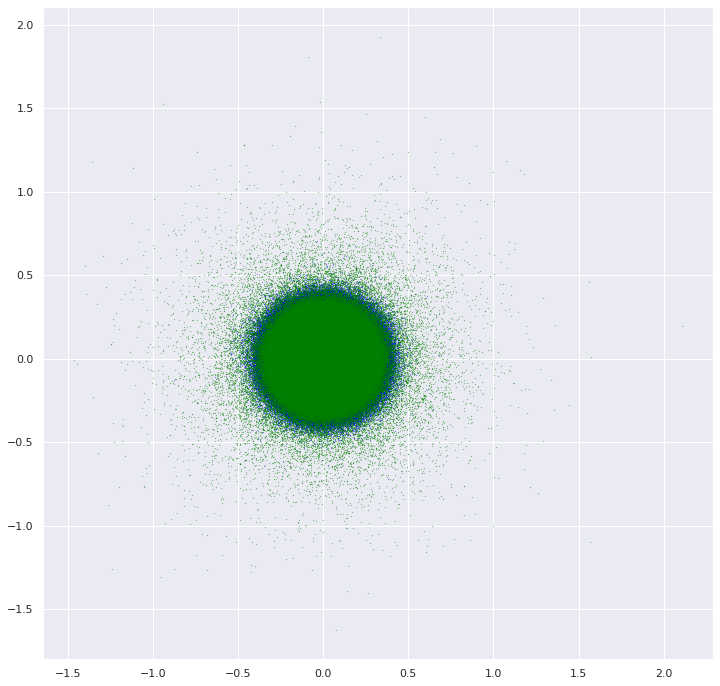

In [37]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [22]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [23]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [24]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [25]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [26]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

/pio/scratch/1/i313924/miniconda3/envs/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


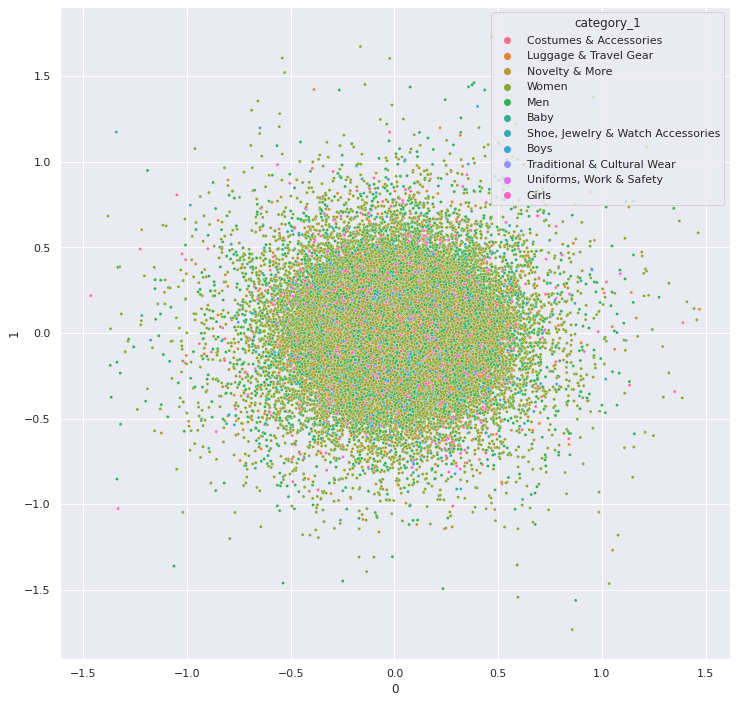

In [27]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

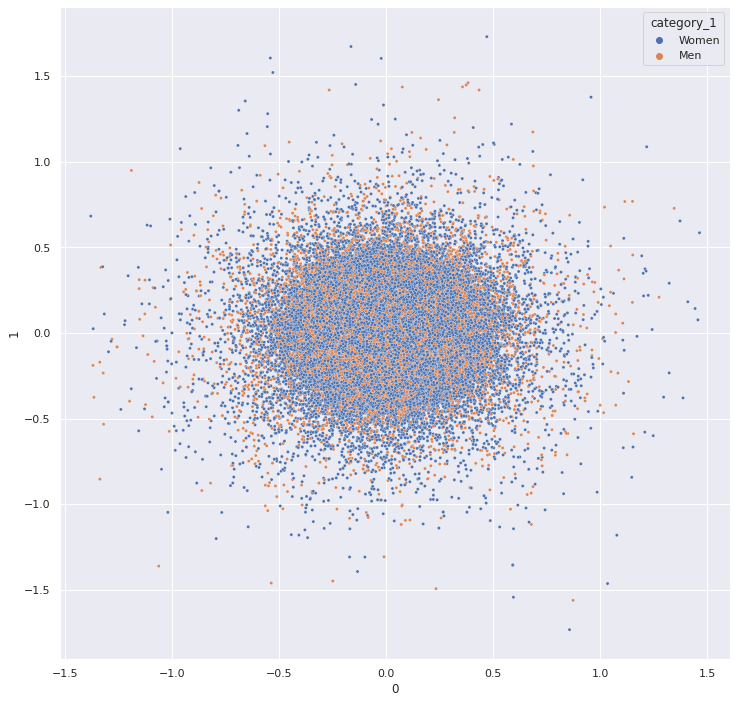

In [28]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)